In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Problem 3

### (a)

In [21]:
path = 'iris.csv'
iris = pd.read_csv(path, header=None)

In [22]:
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [29]:
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

In [30]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [31]:
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [40]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (112, 4) (112,)
Test set shape: (38, 4) (38,)


From the indices for the X_train, we see that the split is indeed random (not consecutive)

In [43]:
X_train

,0,1,2,3
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


### (b)

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [47]:
print(f"PCA decomposition shape: {X_train_pca.shape}")

PCA decomposition shape: (112, 2)


In [50]:
df_pca = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Class'] = y_train
df_pca

,Principal Component 1,Principal Component 2,Class
0,0.451878,-0.126531,1
1,0.162624,-0.431250,1
2,2.113020,0.149036,2
3,-2.949155,-0.089098,0
4,1.875502,0.345670,2
...,...,...,...
107,-2.732974,-0.069181,0
108,1.908646,-0.234124,2
109,0.169159,-0.358948,1
110,3.456095,1.085525,2


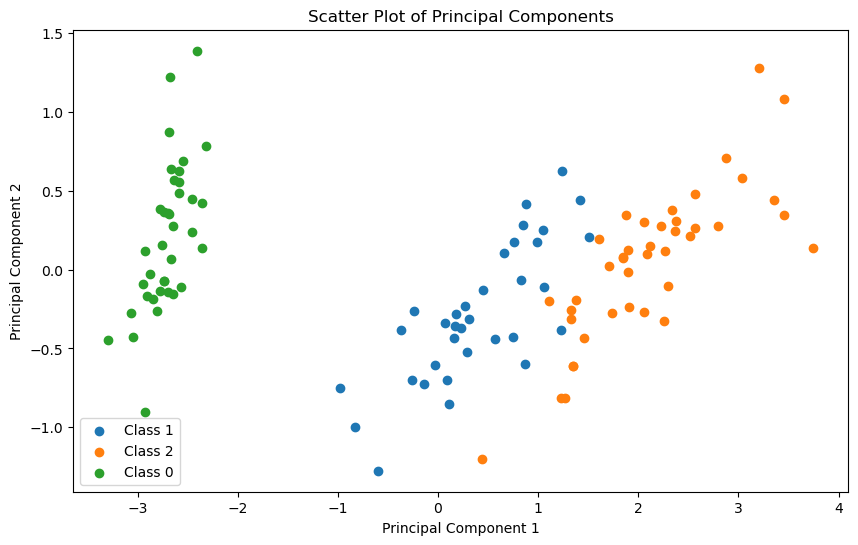

In [51]:
plt.figure(figsize=(10, 6))
classes = df_pca['Class'].unique()
for class_label in classes:
    plt.scatter(df_pca.loc[df_pca['Class'] == class_label, 'Principal Component 1'],
                df_pca.loc[df_pca['Class'] == class_label, 'Principal Component 2'],
                label=f'Class {class_label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.legend()
plt.show()

### (c)

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
# Trained a decision tree classifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train_pca, y_train)

DecisionTreeClassifier(random_state=0)

In [55]:
# Evaluated the classfier on the test data set
X_test_pca = pca.transform(X_test)
y_pred = classifier.predict(X_test_pca)

Below we plot the decision boundary of the trained model

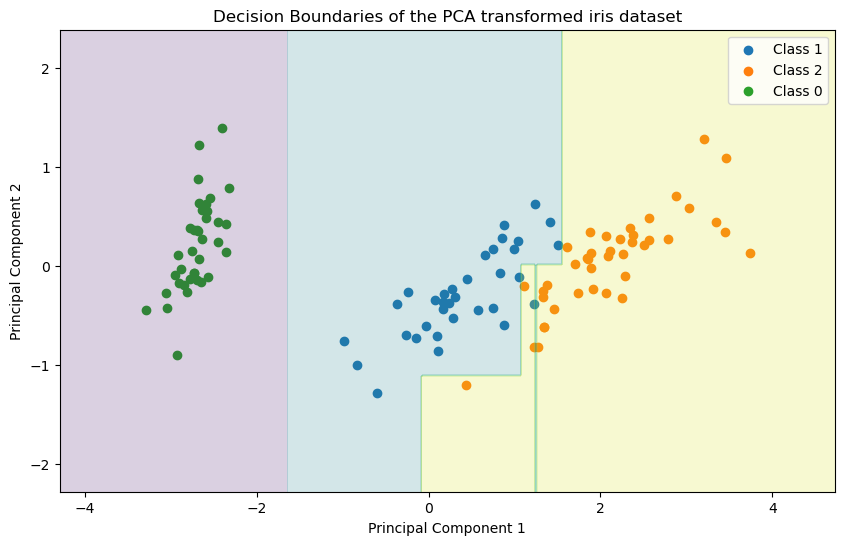

In [67]:
# Plot decision boundaries
plt.figure(figsize=(10, 6))
for class_label in classes:
    plt.scatter(df_pca.loc[df_pca['Class'] == class_label, 'Principal Component 1'],
                df_pca.loc[df_pca['Class'] == class_label, 'Principal Component 2'],
                label=f'Class {class_label}')

h = .02 
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries of the PCA transformed iris dataset')
plt.legend()
plt.show()

### (d)

In [57]:
from sklearn.metrics import accuracy_score

In [59]:
# Evaluated the accuracy score using the accuracy_score metric in sklearn
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree classifier: {accuracy:.2f}')

Accuracy of the Decision Tree classifier: 0.95


Below we see that our prediction pretty much matches with the ground truth

In [64]:
print(f"Prediction: {y_pred}")
print(f"Ground truth: {y_test}")

Prediction: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 1 2 1 0
 2]
Ground truth: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


### (e)

In [73]:
alphas = np.linspace(0.0, 1, 100)

In [74]:
alpha_values = []
test_errors = []

for alpha in alphas:
    classifier = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    classifier.fit(X_train_pca, y_train)
    X_test_pca = pca.transform(X_test)
    y_pred = classifier.predict(X_test_pca)
    test_error = 1 - accuracy_score(y_test, y_pred)
    alpha_values.append(alpha)
    test_errors.append(test_error)

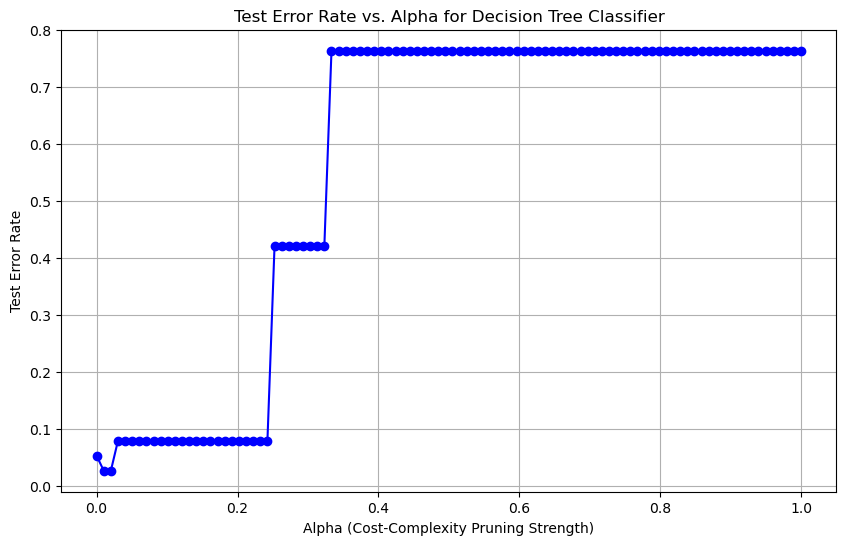

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, test_errors, marker='o', linestyle='-', color='b')
plt.xlabel('Alpha (Cost-Complexity Pruning Strength)')
plt.ylabel('Test Error Rate')
plt.title('Test Error Rate vs. Alpha for Decision Tree Classifier')
plt.grid(True)
plt.show()

From the above graph, we see that alpha between 0.01 and 0.02 minimizes the test error rate

## Problem 4

### (a)

In [93]:
path = 'iris.csv'
iris = pd.read_csv(path, header=None)
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

iris_binary = iris[iris['class'] != 'Iris-versicolor']
iris_binary

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### (b)

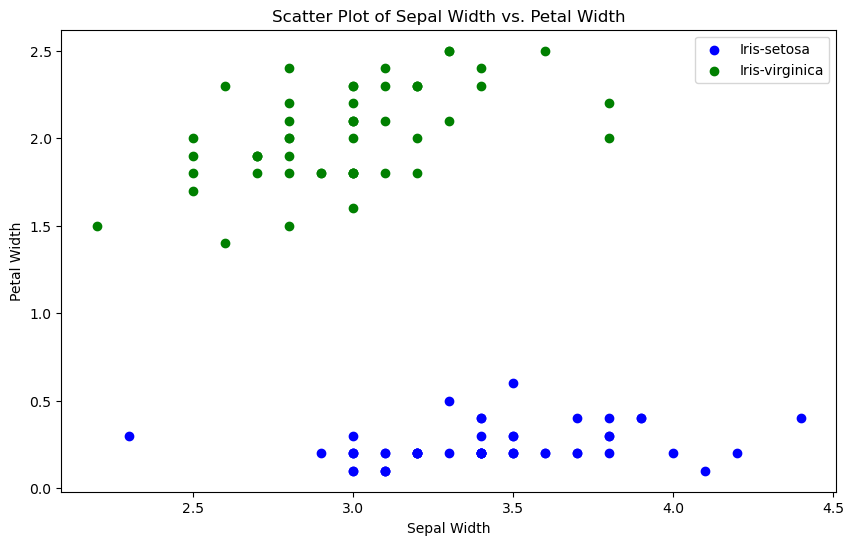

In [94]:
plt.figure(figsize=(10, 6))
colors = {'Iris-setosa': 'blue', 'Iris-virginica': 'green'}

for class_label, color in colors.items():
    class_data = iris_binary[iris_binary['class'] == class_label]
    plt.scatter(class_data['sepal_width'], class_data['petal_width'], label=f'{class_label}', color=color)

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Sepal Width vs. Petal Width')
plt.legend()
plt.show()

### (c)

In [120]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [121]:
X = iris_binary[['sepal_width', 'petal_width']]
y = iris_binary.iloc[:, -1]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (75, 2) (75,)
Test set shape: (25, 2) (25,)


In [127]:
n_estimators_values = [1, 2, 3]

n_estimator_result = []

for i, n_estimators in enumerate(n_estimators_values, 1):
    base_estimator = SVC(kernel='linear', probability=True, random_state=0)
    classifier_adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=n_estimators, random_state=0)

    classifier_adaboost.fit(X_train, y_train)

    y_pred_adaboost = classifier_adaboost.predict(X_test)

    n_estimator_result.append(y_pred_adaboost)

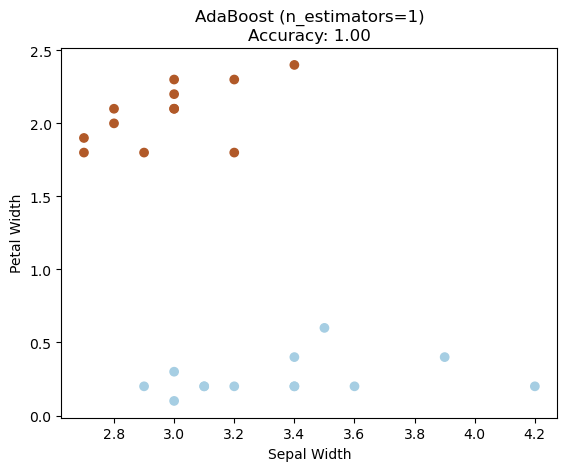

In [128]:
plt.scatter(X_test['sepal_width'], X_test['petal_width'], c=n_estimator_result[0], cmap=plt.cm.Paired)
plt.title(f'AdaBoost (n_estimators={1})\nAccuracy: {accuracy_score(y_test, y_pred_adaboost):.2f}')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.show()

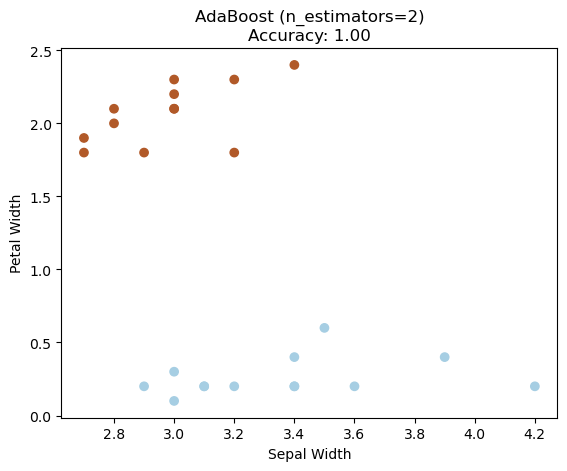

In [129]:
plt.scatter(X_test['sepal_width'], X_test['petal_width'], c=n_estimator_result[1], cmap=plt.cm.Paired)
plt.title(f'AdaBoost (n_estimators={2})\nAccuracy: {accuracy_score(y_test, y_pred_adaboost):.2f}')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.show()

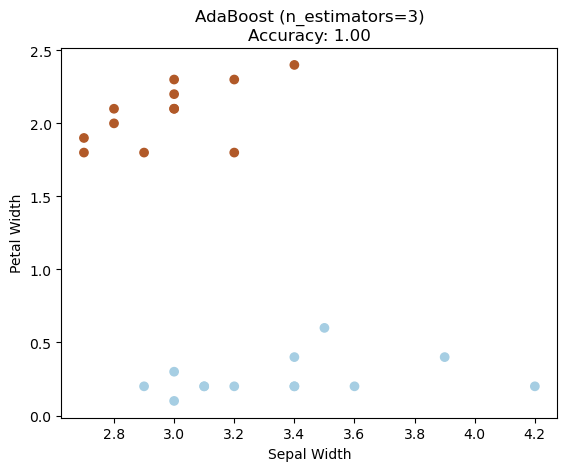

In [130]:
plt.scatter(X_test['sepal_width'], X_test['petal_width'], c=n_estimator_result[2], cmap=plt.cm.Paired)
plt.title(f'AdaBoost (n_estimators={3})\nAccuracy: {accuracy_score(y_test, y_pred_adaboost):.2f}')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.show()

### (d)

By comparing figure from part (b) to the three scatter plots, we see that AdaBoost gives an accurate decision boundary (the partition of the test data is the same of the separation of training data, where iris-setosa is on top and iris-virginica is at the bottom), moreover, we see that n_estimator = 1 gives decent performace already.